<a href="https://colab.research.google.com/github/kap2fox/Intro-to-Robotics/blob/main/Robot_Navigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключаем необходимы библиотеки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math as m

Задаем параметры и время.

In [2]:
T_m = 0.08
k_e = 0.5
n = 15001
t = np.linspace(0,15,n) # create time vector
B = 0.15
r = 0.026

Описываем модель двигателя.

In [3]:
def motor(state,t,u):
    speed, angle = state
    state_dt = [-speed/T_m + u/ (T_m * k_e), speed ]
    return state_dt

Указывавем начальные значения переменных.

In [4]:
state_l = [0 , 0]
state_r = [0 , 0]
control_l = np.zeros(n)
control_r = np.zeros(n)
theta_l = np.zeros(n)
theta_r = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)
path = np.zeros(n)
course = np.zeros(n)
distance = np.zeros(n)
bearing = np.zeros(n)
courseAngle = np.zeros(n)
X_ref = -1
Y_ref = 0
distance [0] = m.sqrt((X_ref)**2+(Y_ref)**2)
bearing [0] = m.atan2(Y_ref,X_ref)


Запускаем основной цикл езды.

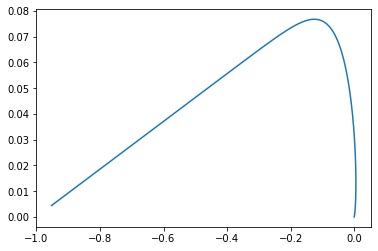

In [5]:
for i in range(1,n):

    path[i] = (theta_r[i-1] + theta_l[i-1]) * r / 2
    course[i] = (theta_r[i-1] - theta_l[i-1]) * r / B
    x[i] = x[i-1] + (path[i]-path[i-1]) * m.cos(course[i])
    y[i] = y[i-1] + (path[i]-path[i-1]) * m.sin(course[i])
    distance [i] = m.sqrt((X_ref - x[i])**2+(Y_ref - y[i])**2)
    bearing [i] = m.atan2(Y_ref - y[i],X_ref - x[i])
    courseAngle [i] = bearing [i] - course [i]
    if courseAngle[i] > np.pi:
            courseAngle[i] = courseAngle[i] - 2 * np.pi
    if courseAngle[i] < -np.pi:
            courseAngle[i] = courseAngle[i] + 2 * np.pi

    #control_l [i] = 6 * np.cos (courseAngle [i]) * np.tanh(distance [i]) - 2 * (courseAngle [i])
    #control_r [i] = 6 * np.cos (courseAngle [i]) * np.tanh(distance [i]) + 2 * (courseAngle [i])
    control_l [i] = 4 * distance [i] - 4 * courseAngle [i]
    control_r [i] = 4 * distance [i] + 4 * courseAngle [i]
    if control_l[i] > 8:
            control_l[i] = 8
    if control_l[i] < -8:
            control_l[i] = -8
    if control_r[i] > 8:
            control_r[i] = 8
    if control_r[i] < -8:
            control_r[i] = -8

    motor_l = odeint(motor, state_l,[t[i-1],t[i]],args=(control_l [i],))
    state_l = motor_l[1,:]
    theta_l[i] = motor_l[1,1]
    motor_r = odeint(motor, state_r,[t[i-1],t[i]],args=(control_r [i],))
    state_r = motor_r[1,:]
    theta_r[i] = motor_r[1,1]
    
plt.plot(x, y)